## 1. 필요한 패키지들을 불러옵니다.

In [1]:
import os
BASE_PATH = os.path.dirname(os.getcwd())
os.chdir(BASE_PATH)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model

In [7]:
from utils.helper import images_cropper, glob_all_files, paths2numpy
from utils.helper import draw_rectangles, show_images

In [5]:
paths = glob_all_files('./new_crop_data/test_imgs//')

assert paths, print("올바른 경로가 아니거나, 경로 내에 평가용 이미지가 존재하지 않습니다.")

imgs = paths2numpy(paths)



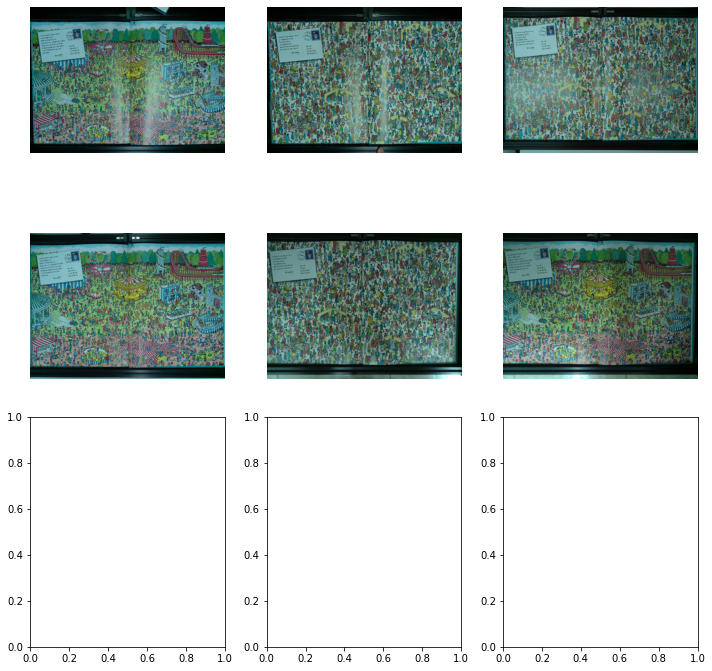

In [8]:
show_images(imgs)

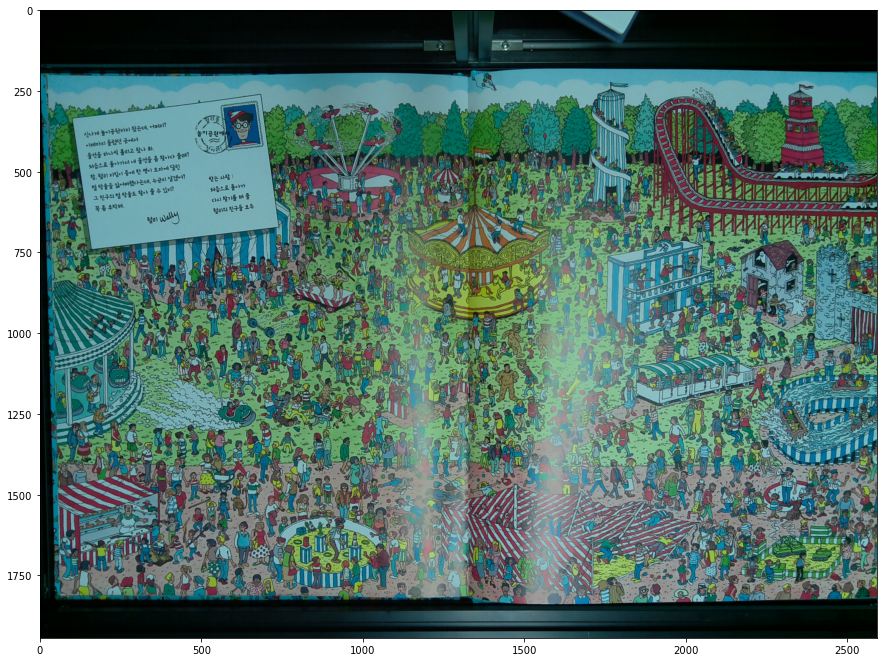

In [12]:
plt.figure(figsize=(15,12))
plt.imshow(imgs[0])

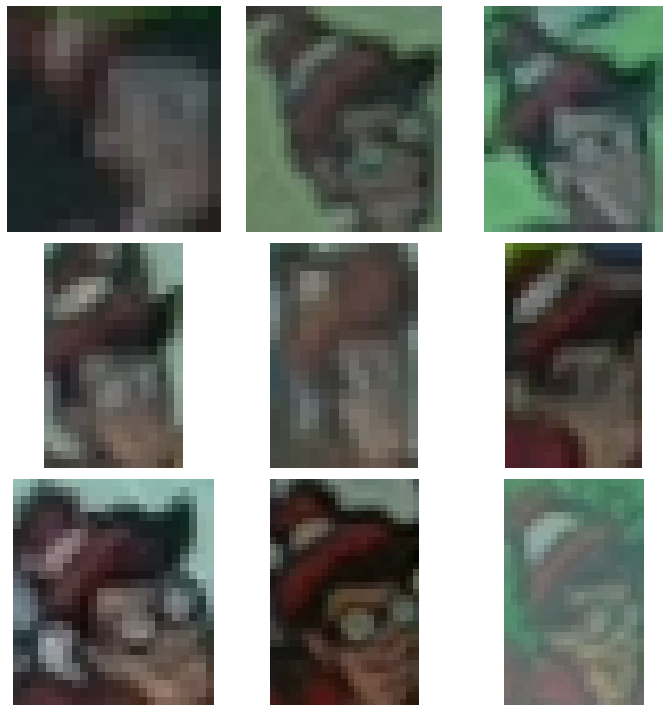

In [25]:
wally = paths2numpy(glob_all_files("./new_crop_data/face/wally/"))
show_images(wally)                    

In [161]:
import imgaug as ia
import imgaug.augmenters as iaa
def random_imaug(fg_img, dark_weight, light_weight, prob):
    """
    Describes:
        포그라운드 이미지들에 여러가지 효과들을 적용시킨 후 저장하는 함수입니다.
        참고: https://github.com/aleju/imgaug (패키지 깃헙)
             https://imgaug.readthedocs.io/en/latest/source/examples_basics.html (코드)
    Parameter:
        fg_imgs : list, 포그라운드 이미지들
    Return:
        list : 여러가지 효과가 적용된 포그라운드 이미지
    """
    sometimes = lambda aug: iaa.Sometimes(prob, aug)
    ia.seed(1)
    # Example batch of images.
    # The array has shape (32, 64, 64, 3) and dtype uint8.
    images = fg_img
    
    # 기본 이미지에 밝기 어둡게 0.1~0.8배 어둡게 만듬
    lightness = iaa.Sequential([
        sometimes(iaa.GaussianBlur(sigma=(1.5, 1.5))),
        #sometimes(iaa.Multiply((dark_weight, light_weight)))
        
    ], random_order=True)  # apply not augmenters in random order
    
    imgaug = lightness(images=images)

    return imgaug

소벨 엣지 검출기

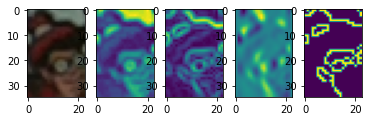

In [173]:
from skimage import filters
from skimage import color
import cv2
onelly = wally[7]
gray = color.rgb2gray(onelly)
edge = filters.sobel(gray)
cv = cv2.Sobel(gray, -1, 1, 0 , ksize=5)
canny = cv2.Canny(cv2.cvtColor(onelly, cv2.COLOR_BGR2GRAY), 100, 200, 3)
total = [onelly, gray, edge, cv, canny]
fig, axes = plt.subplots(1,5)
axes = axes.ravel()
for ind, ax in enumerate(axes):
    try:
        ax.imshow(total[ind])
    except IndexError:
        pass

In [166]:
blur_wally = random_imaug(wally,0.5, 1.5 , 1)
blur_gray = color.rgb2gray(blur_wally)
blur_edge = filters.sobel(blur_gray)
total = [blur_wally, blur_gray, blur_edge]
fig, axes = plt.subplots(2,2)
axes = axes.ravel()
for ind, ax in enumerate(axes):
    try:
        ax.imshow(total[ind])
    except IndexError:
        pass

AttributeError: 'list' object has no attribute 'ndim'

케니 에지 검출기

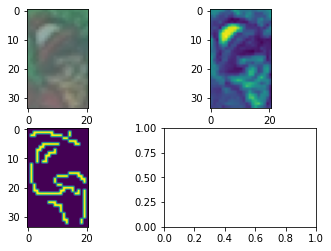

In [149]:
from skimage import feature
onelly = wally[8]
gray = color.rgb2gray(onelly)
canny = feature.canny(gray, 1,)
total = [onelly, gray, canny]
fig, axes = plt.subplots(2,2)
axes = axes.ravel()
for ind, ax in enumerate(axes):
    try:
        ax.imshow(total[ind])
    except IndexError:
        pass

/Users/changhyun/opt/anaconda3/lib/python3.8/site-packages/imgaug/augmenters/base.py:27: SuspiciousMultiImageShapeWarning: You provided a numpy array of shape (18, 17, 3) as a multi-image augmentation input, which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use e.g. augmenter(image=<your input>) or augment_image(<your input>) -- note the singular 'image' instead of 'imageS'. Otherwise your single input image will be interpreted as multiple images of shape (H, W) during augmentation.
  ia.warn(


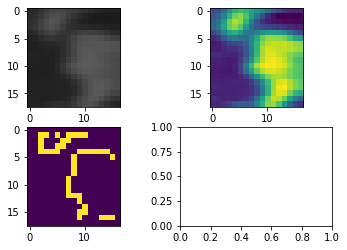

In [108]:
blur_wally = random_imaug(np.array(onelly),0.5, 1.5 , 1)
blur_gray = color.rgb2gray(blur_wally)
blur_edge = feature.canny(blur_gray, 0.0005)
total = [blur_wally, blur_gray, blur_edge]
fig, axes = plt.subplots(2,2)
axes = axes.ravel()
for ind, ax in enumerate(axes):
    try:
        ax.imshow(total[ind])
    except IndexError:
        pass

Hough

TypeError: Invalid shape (33, 2, 2) for image data

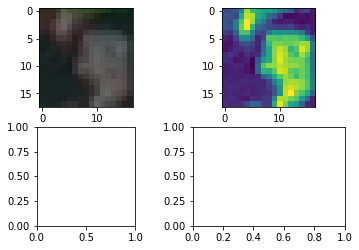

In [123]:
from skimage.transform import(hough_line, probabilistic_hough_line)
onelly = wally[0]
gray = color.rgb2gray(onelly)
edge = filters.sobel(gray)
lines = hough_line(edge)
probabilistic_lines = probabilistic_hough_line(edge, threshold=10, line_length=5, line_gap=3)
total = [onelly, gray, probabilistic_lines]
fig, axes = plt.subplots(2,2)
axes = axes.ravel()
for ind, ax in enumerate(axes):
    try:
        ax.imshow(total[ind])
    except IndexError:
        pass

윤곽선 검출

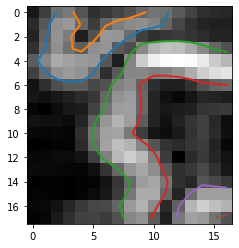

In [148]:
from skimage import filters
from skimage import color
from skimage import measure

onelly = wally[0]
gray = color.rgb2gray(blur_wally)
edge = filters.sobel(gray)
countours = measure.find_contours(edge, 0.05)

fig, ax = plt.subplots()
ax.imshow(edge, interpolation="nearest", cmap = plt.cm.gray)
for n, countour in enumerate(countours):
    ax.plot(countour[:,1], countour[:,0], linewidth=2)
plt.show()